## Jury Data

<ol>
<tr>
    <td>
       <li> Loading the Data</li>
       <li>Renaming columns</li>
       <li>Calculating damages percentage for Mesa Management</li>  
       <li>Cleaing data by replacing or removing null values depending on the requirements</li>
       <li>Changing data types</li>
    </td>
</tr>
</ol>


In [1]:

# coding: utf-8
import pandas as pd
import numpy as np

################### Old Data Set ###################


data = pd.read_csv('jury_data.csv', encoding= 'ISO-8859-1', skiprows=[0,2])
data.rename(columns={"Was defendant Mesa Management negligent?": "Mesa_Negligent", 
                         "Was Mesa Management's negligence a substantial factor in causing harm to  Mackenzie Dunn?":"Liability",
                         "What are the total damages that you find that MacKenzie Dunn sufferered?":"damages" ,
                         "What is your sex?": "gender",
                         "Please write your answer to the preceding damages question in words (quality check).":"damages_word",
                         "What percentage of responsibility for Mackenzie Dunn's injuries was each party responsible for? (Answers should add up to 100%) - Mesa Management Co":"Mesa_reponsible_percentage",
                         "Path":"Scenario",
                         "Was MacKenzie Dunn negligent?":"Dunn_negligent",
                         "Unnamed: 63":"perc_calc"
                         },inplace=True)
data['mm_perc'] = np.where(data['Mesa_reponsible_percentage']>=1, data['perc_calc'], data['Mesa_reponsible_percentage'])
req_data = pd.DataFrame(data[["Mesa_Negligent","damages","Liability",
                 "gender",
                 "damages_word",
                 "Scenario","Dunn_negligent","perc_calc","Start Date","End Date","mm_perc"]])


req_data['Liability'] = req_data['Liability'].map({'Yes': 1, 'No': 0})

#printing the columns of data
print(req_data.columns)


pd.isnull(req_data).any()
pd.isnull(req_data['Scenario']).any()
req_data = req_data[np.isfinite(data['Scenario'])]
pd.isnull(req_data['Scenario']).any()
req_data['damages'].fillna(0,inplace=True)
req_data['damages_word'].fillna(0,inplace=True)
req_data['mm_perc'].fillna(1,inplace=True)
req_data['perc_calc'].fillna(0,inplace=True)

pd.isnull(req_data).any()




#Changing data types of columns
req_data['End Date'] = pd.to_datetime(data['End Date'])
req_data['Start Date'] = pd.to_datetime(data['Start Date'])
req_data['Scenario']= req_data.Scenario.astype(int)
req_data['Liability']= req_data.Liability.astype(int)
req_data.dtypes





# Getting the id of the column
data.columns.get_loc("Liability")










Index(['Mesa_Negligent', 'damages', 'Liability', 'gender', 'damages_word',
       'Scenario', 'Dunn_negligent', 'perc_calc', 'Start Date', 'End Date',
       'mm_perc'],
      dtype='object')


55

In [2]:
#Cleaning Damages and perc_calc column
req_data['damages'] = req_data['damages'].str.replace(',', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace('$', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace(',', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace('-', '')
req_data['perc_calc'] = req_data['perc_calc'].str.replace("  ", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace("$", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace(",", '')
req_data['mm_perc'] = req_data['mm_perc'].str.replace("  ", '')
#req_data.damages=pd.to_numeric(req_data['damages'].str.replace(',', ''))
#req_data.perc_calc=pd.to_numeric(req_data.perc_calc)
#print(req_data.isnull().any())




req_data.damages=pd.to_numeric(req_data['damages'])
req_data.perc_calc=pd.to_numeric(req_data.perc_calc)
req_data['damages'].fillna(0,inplace=True)  
req_data['mm_perc'].fillna(1,inplace=True)
req_data['perc_calc'].fillna(0,inplace=True)
#print(req_data.damages)

req_data[pd.isnull(req_data['Dunn_negligent'])]


#checking for any null values
req_data.isnull().any()

Mesa_Negligent    False
damages           False
Liability         False
gender            False
damages_word      False
Scenario          False
Dunn_negligent     True
perc_calc         False
Start Date        False
End Date          False
mm_perc           False
dtype: bool

# Case Expected Value Damages:
## Showing the total expected damages mean,median and sd with winrate percentage (entire version)


In [3]:
#EDA

req_data['winrate_percentage']=req_data.Liability
req_data['damages_mean']=req_data.damages+req_data.perc_calc
req_data['damages_median']=req_data.damages
req_data['damages_sd']=req_data.damages

winrate_damages_expected=req_data.groupby('Scenario').aggregate(
    {'winrate_percentage': np.mean, 'damages_mean': np.mean,'damages_median':np.median,'damages_sd':np.std})


winrate_damages_expected.winrate_percentage*=100
winrate_damages_expected

,winrate_percentage,damages_mean,damages_median,damages_sd
Scenario,,,,
1,47.263682,86726.368159,0.0,103468.323799
2,48.730964,89847.715736,0.0,102895.999731
3,68.817204,125663.978495,105000.0,109965.448888
4,60.294118,111214.852941,100000.0,106675.801852
5,57.591623,96426.701571,90000.0,100404.383527


# Winrate plintiffwins
### Showing the damages mean,median and sd of liability awarded to the plaintiff when plaintiff wins


In [4]:

#req_data['winrate_percentage']=np.mean(req_data.Juror_Response)
#print(req_data)
req_data['mm_perc'].fillna(1,inplace=True)
req_data['damages_mean1']=req_data.damages*pd.to_numeric(req_data.mm_perc)
req_data['damages_median1']=req_data.damages
req_data['damages_sd1']=req_data.damages
#print(req_data.mm_perc)

winrate_damages_plaintiffwin=req_data.loc[(req_data['Dunn_negligent']=='No') & (req_data['Liability']==1)].groupby('Scenario').aggregate({'damages_mean1': np.mean,'damages_median1':np.median,'damages_sd1':np.std})


winrate_damages_plaintiffwin

,damages_mean1,damages_median1,damages_sd1
Scenario,,,
1,185125.000000,180000.0,78852.429869
2,177743.902439,160000.0,72767.821367
3,186972.477064,180000.0,80274.466527
4,189429.906542,180000.0,73657.559546
5,173118.279570,150000.0,78781.184228


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.factorplot(x='Scenario', y='damages', kind='box',data=req_data)



Liability,0,1
Scenario,,
1,106,95
2,101,96
3,58,128
4,81,123
5,81,110


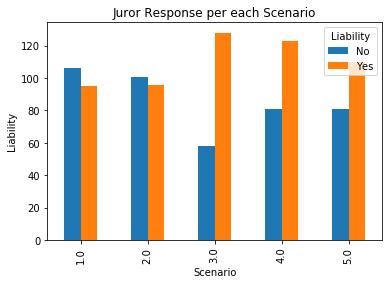

In [6]:
pd.crosstab(data.Scenario,data.Liability).plot(kind='bar')
plt.title('Juror Response per each Scenario')
plt.xlabel('Scenario')
plt.ylabel('Liability')
plt.savefig('Juror Response per each Scenario')





a = req_data['Scenario']
b = req_data['Liability']
pd.crosstab(a,b)

## New data set (Snowboard)

## Loading data and renaming columns ,printing first 10 rows of data

In [7]:
import pandas as pd
df =pd.read_csv('Low_Anchor.tsv', sep='\t+',skiprows=[0,2, 4]+list(range(1,1614,2)) + [1614], names = ['StartDate', 'EndDate',
       'ResponseType', 
       'IP Address', 
       'Progress', 
       'Duration',
       'Finished',
       'RecordedDate',
       'ResponseID', 
       'RecipientLastName','RecipientFirstName','RecipientEmail',
       'ExternalDataReference','LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Participation_in_this_project.',
       'Browser Meta Info - Browser',
       'Browser Meta Info - Version',
       'Browser Meta Info - Operating System',
       'Browser Meta Info - Resolution',
       'What number did you hear?',
       'What word did you see?',
       'What is your sex?',
       'How old are you?',
       'Which of the following best describes your ethnicity?',
       'Are you Spanish/Hispanic/Latino',
       'What is the highest degree or level of school you have completed?',
       'This is an attention check.  Select 200.',
       'Which of the following best describes your total household income?',
       'Where would you place yourself on this scale?',
       'What is your zip code?',
       'Timing - First Click','Timing - Last Click','Timing - Page Submit', 'Timing - Click Count',
       'Timing - First Click.1', 'Timing - Last Click.1', 'Timing - Page Submit.1',
       'Timing - Click Count.1', 'Timing - First Click.2','Timing - Last Click.2',
       'Timing - Page Submit.2','Timing - Click Count.2','Timing - First Click.3','Timing - Last Click.3',
       'Timing - Page Submit.3','Timing - Click Count.3','Timing - First Click.4', 'Timing - Last Click.4',
       'Timing - Page Submit.4','Timing - Click Count.4', 'Timing - First Click.5', 'Timing - Last Click.5',
       'Timing - Page Submit.5','Timing - Click Count.5', 'Timing - First Click.6', 'Timing - Last Click.6',
       'Timing - Page Submit.6',  'Timing - Click Count.6', 'Timing - First Click.7','Timing - Last Click.7',
       'Timing - Page Submit.7',  'Timing - Click Count.7',
       'Identify the statement that correctly describes the facts of this case. (This is the attention check)',
       'Was_snowboard_sold_McNeil_defective_14', ## using this
       "Is_substantial_factor_McNeil_injuries_14",
       'Non_economic_damages_McNeil_suffered_14',
       'Damages_words_14',
       'Was_McNeil_negligent',
       'McNeil_negligence_substantial_factor_for_injuries',
       'Percentage_of_responsibility_X5',
       'Percentage_of_responsibility_McNeil',
       'Was_snowboard_sold_McNeil_defective_58',
       "Is_substantial_factor_McNeil_injuries_58",
       'Economic_damages_McNeil_suffer_58',
       'Economic_Damages_In_Word_58',
       'Non_economic_damages_McNeil_suffered_58',
       'Non_Economic_Damages_In_Word_58',
       'Please explain why you arrived at your decision? (50 character minimum)',
       'Did the fact that X5 added core inserts to the later Carve 3000 model, affect your view as to whether the original Carve 3000 was defective?',
       'Were you able to ignore the  fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?',
       'Path'])
        
df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,StartDate,EndDate,ResponseType,IP Address,Progress,Duration,Finished,RecordedDate,ResponseID,RecipientLastName,...,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Economic_Damages_In_Word_58,Non_economic_damages_McNeil_suffered_58,Non_Economic_Damages_In_Word_58,Please explain why you arrived at your decision? (50 character minimum),"Did the fact that X5 added core inserts to the later Carve 3000 model, affect your view as to whether the original Carve 3000 was defective?",Were you able to ignore the fact that X5 added core inserts to the later Carve 3000 model when deciding whether the original Carve 3000 was defective?,Path
0, 4 / 6 / 1 8   1 3 : 1 4 , 4 / 6 / 1 8   1 3 : 1 5 , 0 , 7 6 . 8 4 . 2 5 0 . 1 4 3 , 1 0 0 , 3 4 , 1 , 4 / 6 / 1 8   1 3 : 1 5 , R _ 2 V e D w 6 k P p O 7 N X v z , ,..., , , , , , , , , , 
1, 4 / 6 / 1 8   1 3 : 1 5 , 4 / 6 / 1 8   1 3 : 1 6 , 0 , 1 0 7 . 1 4 0 . 1 9 1 . 1 7 6 , 1 0 0 , 4 2 , 1 , 4 / 6 / 1 8   1 3 : 1 6 , R _ 1 e J q 1 K w X T Y y a e w m , ,..., , , , , , , , , , 
2, 4 / 6 / 1 8   1 3 : 1 7 , 4 / 6 / 1 8   1 3 : 1 8 , 0 , 1 3 8 . 2 0 7 . 1 6 8 . 1 4 8 , 1 0 0 , 6 0 , 1 , 4 / 6 / 1 8   1 3 : 1 8 , R _ 2 q l Q Q Y 4 F U r K Y e y z , ,..., , , , , , , , , , 6 
3, 4 / 6 / 1 8   1 3 : 1 7 , 4 / 6 / 1 8   1 3 : 1 8 , 0 , 7 2 . 1 9 8 . 7 4 . 1 3 5 , 1 0 0 , 6 9 , 1 , 4 / 6 / 1 8   1 3 : 1 8 , R _ 1 l m Z b A x g O 0 A P U 5 T , ,..., , , , , , , , , , 
4, 4 / 6 / 1 8   1 3 : 1 4 , 4 / 6 / 1 8   1 3 : 1 9 , 0 , 1 0 7 . 7 7 . 2 0 9 . 4 2 , 1 0 0 , 2 5 5 , 1 , 4 / 6 / 1 8   1 3 : 1 9 , R _ 1 n O b S X p L 5 d 0 w f Q S , ,..., , , , , , , , , , 7 


In [8]:
#df.dtypes

##Cleaning data

In [9]:
## replacing hexadecimal value of damages'/x00' to ''
for i in range(len(df)):
    df['Was_snowboard_sold_McNeil_defective_14'].values[i] = df['Was_snowboard_sold_McNeil_defective_14'].values[i].replace('\x00','')
    df['Is_substantial_factor_McNeil_injuries_14'].values[i] = df['Is_substantial_factor_McNeil_injuries_14'].values[i].replace('\x00','')
    df['Non_economic_damages_McNeil_suffered_14'].values[i] = df['Non_economic_damages_McNeil_suffered_14'].values[i].replace('\x00','')
    df['Damages_words_14'].values[i] = df['Damages_words_14'].values[i].replace('\x00','')
    df['Was_McNeil_negligent'].values[i] = df['Was_McNeil_negligent'].values[i].replace('\x00','') ;
    df['McNeil_negligence_substantial_factor_for_injuries'].values[i] = df['McNeil_negligence_substantial_factor_for_injuries'].values[i].replace('\x00','') ;
    df['Percentage_of_responsibility_X5'].values[i] = df['Percentage_of_responsibility_X5'].values[i].replace('\x00','') ;
    df['Percentage_of_responsibility_McNeil'].values[i] = df['Percentage_of_responsibility_McNeil'].values[i].replace('\x00','') ;
    df['Was_snowboard_sold_McNeil_defective_58'].values[i] = df['Was_snowboard_sold_McNeil_defective_58'].values[i].replace('\x00','') ;
    df['Is_substantial_factor_McNeil_injuries_58'].values[i] = df['Is_substantial_factor_McNeil_injuries_58'].values[i].replace('\x00','') ;
    df['Economic_damages_McNeil_suffer_58'].values[i] = df['Economic_damages_McNeil_suffer_58'].values[i].replace('\x00','') ;
    df['Economic_Damages_In_Word_58'].values[i] = df['Economic_Damages_In_Word_58'].values[i].replace('\x00','') ;
    df['Non_economic_damages_McNeil_suffered_58'].values[i] = df['Non_economic_damages_McNeil_suffered_58'].values[i].replace('\x00','') ;
    df['Non_Economic_Damages_In_Word_58'].values[i] = df['Non_Economic_Damages_In_Word_58'].values[i].replace('\x00','') ;
    df['Path'].values[i] = df['Path'].values[i].replace('\x00','') ;  
    #df['Was the Carve 3000 snowboard X5 sold Connor McNeil defective?'].values[i] =  df['Was the Carve 3000 snowboard X5 sold Connor McNeil defective?'].values[i].replace('\x00','') ;  

In [10]:
## Changing Data type
df.StartDate = pd.to_datetime(df.StartDate)
df.EndDate   = pd.to_datetime(df.EndDate) 
#df.Was_snowboard_sold_McNeil_defective_14   = pd.to_numeric(df.Was_snowboard_sold_McNeil_defective_14)
df.Is_substantial_factor_McNeil_injuries_14 = pd.to_numeric(df.Is_substantial_factor_McNeil_injuries_14)
df.Non_economic_damages_McNeil_suffered_14  = pd.to_numeric(df.Non_economic_damages_McNeil_suffered_14)
df.Was_McNeil_negligent                     = pd.to_numeric(df.Was_McNeil_negligent)
df.McNeil_negligence_substantial_factor_for_injuries= pd.to_numeric(df.McNeil_negligence_substantial_factor_for_injuries)
df.Percentage_of_responsibility_X5          = pd.to_numeric(df.Percentage_of_responsibility_X5)
df.Percentage_of_responsibility_McNeil      = pd.to_numeric(df.Percentage_of_responsibility_McNeil)
#df.Was_snowboard_sold_McNeil_defective_58   = pd.to_numeric(df.Was_snowboard_sold_McNeil_defective_58)
df.Is_substantial_factor_McNeil_injuries_58 = pd.to_numeric(df.Is_substantial_factor_McNeil_injuries_58)
df.Economic_damages_McNeil_suffer_58        = pd.to_numeric(df.Economic_damages_McNeil_suffer_58)
df.Non_economic_damages_McNeil_suffered_58  = pd.to_numeric(df.Non_economic_damages_McNeil_suffered_58)
# Handling for Path
df.Path = pd.to_numeric(df.Path) 
df['Path'].fillna(0,inplace = True)
df.Path =  df.Path.astype(int)
df.dtypes

StartDate                                                                                                                                                  datetime64[ns]
EndDate                                                                                                                                                    datetime64[ns]
ResponseType                                                                                                                                                       object
IP Address                                                                                                                                                         object
Progress                                                                                                                                                           object
Duration                                                                                                                                              

# Extracting the required columns and storing it in "newdf" data frame.

In [11]:
newdf =pd.DataFrame(df[['StartDate', 'EndDate',
       'Was_snowboard_sold_McNeil_defective_14', 
       "Is_substantial_factor_McNeil_injuries_14",
       'Non_economic_damages_McNeil_suffered_14',                                                                                         
       'Was_McNeil_negligent',
       'McNeil_negligence_substantial_factor_for_injuries',                                                                                         
       'Percentage_of_responsibility_X5',
       'Percentage_of_responsibility_McNeil'                                                                                      ,
       'Was_snowboard_sold_McNeil_defective_58',
       "Is_substantial_factor_McNeil_injuries_58",
       'Economic_damages_McNeil_suffer_58',
       'Non_economic_damages_McNeil_suffered_58',
       'Path']])
        
newdf.head(5)

,StartDate,EndDate,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Path
0,2018-04-06 13:14:00,2018-04-06 13:15:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0
1,2018-04-06 13:15:00,2018-04-06 13:16:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0
2,2018-04-06 13:17:00,2018-04-06 13:18:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,6
3,2018-04-06 13:17:00,2018-04-06 13:18:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0
4,2018-04-06 13:14:00,2018-04-06 13:19:00,,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,7


### Removed rows with path == 0

In [12]:

newdf = newdf[newdf.Path > 0]

## Replacing the Null Values with empty string(Easy to convert to other datatypes Later)

In [13]:
import numpy as np
print(pd.isnull(newdf).any())
newdf = newdf[np.isfinite(newdf['Path'])]
newdf['Is_substantial_factor_McNeil_injuries_14'].fillna("",inplace=True)
newdf['Non_economic_damages_McNeil_suffered_14'].fillna("",inplace=True)
newdf['Was_McNeil_negligent'].fillna("",inplace=True)
newdf['McNeil_negligence_substantial_factor_for_injuries'].fillna("",inplace=True)
newdf['Percentage_of_responsibility_X5'].fillna("",inplace=True)
newdf['Percentage_of_responsibility_McNeil'].fillna("",inplace=True)
newdf['Was_snowboard_sold_McNeil_defective_58'].fillna("",inplace=True)
newdf['Is_substantial_factor_McNeil_injuries_58'].fillna("",inplace=True)
newdf['Economic_damages_McNeil_suffer_58'].fillna("",inplace=True)
newdf['Non_economic_damages_McNeil_suffered_58'].fillna("",inplace=True)
# Printing the first 5 lines.
newdf.head(5)

StartDate                                            False
EndDate                                              False
Was_snowboard_sold_McNeil_defective_14               False
Is_substantial_factor_McNeil_injuries_14              True
Non_economic_damages_McNeil_suffered_14               True
Was_McNeil_negligent                                  True
McNeil_negligence_substantial_factor_for_injuries     True
Percentage_of_responsibility_X5                       True
Percentage_of_responsibility_McNeil                   True
Was_snowboard_sold_McNeil_defective_58               False
Is_substantial_factor_McNeil_injuries_58              True
Economic_damages_McNeil_suffer_58                     True
Non_economic_damages_McNeil_suffered_58               True
Path                                                 False
dtype: bool


,StartDate,EndDate,Was_snowboard_sold_McNeil_defective_14,Is_substantial_factor_McNeil_injuries_14,Non_economic_damages_McNeil_suffered_14,Was_McNeil_negligent,McNeil_negligence_substantial_factor_for_injuries,Percentage_of_responsibility_X5,Percentage_of_responsibility_McNeil,Was_snowboard_sold_McNeil_defective_58,Is_substantial_factor_McNeil_injuries_58,Economic_damages_McNeil_suffer_58,Non_economic_damages_McNeil_suffered_58,Path
2,2018-04-06 13:17:00,2018-04-06 13:18:00,,,,,,,,,,,,6
4,2018-04-06 13:14:00,2018-04-06 13:19:00,,,,,,,,,,,,7
8,2018-04-06 13:17:00,2018-04-06 13:21:00,4,5,200000,1,1,50,50,,,,,3
9,2018-04-06 13:18:00,2018-04-06 13:21:00,4,5,35000,1,1,65,35,,,,,2
11,2018-04-06 13:19:00,2018-04-06 13:25:00,,,,,,,,6,,,,6


### Changing datatype of damages and filling NULL values with 0s.

In [14]:
newdf.Economic_damages_McNeil_suffer_58        = pd.to_numeric(newdf.Economic_damages_McNeil_suffer_58)
newdf.Non_economic_damages_McNeil_suffered_58  = pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58)
newdf.Non_economic_damages_McNeil_suffered_14  = pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) 

newdf.Economic_damages_McNeil_suffer_58.fillna(0, inplace = True)
newdf.Non_economic_damages_McNeil_suffered_58.fillna(0, inplace = True)
newdf.Non_economic_damages_McNeil_suffered_14.fillna(0, inplace = True)


In [15]:
## Creating new column "Liability" from two different columns. 
## Was_snowboard_sold_McNeil_defective_14 : Having Path values from 1 to 4.
## Was_snowboard_sold_McNeil_defective_58 : Having Path values from 5 to 8.

newdf['Liability'] = newdf['Was_snowboard_sold_McNeil_defective_14'] + newdf['Was_snowboard_sold_McNeil_defective_58']
newdf['Total_Damages'] =  newdf['Economic_damages_McNeil_suffer_58']+newdf['Non_economic_damages_McNeil_suffered_58'] + newdf['Non_economic_damages_McNeil_suffered_14']

In [16]:
## For graph we are changing the value 4 and 6 to Yes and No. Liability with blank is replace with "No Reponse"
newdf['Liability'].replace(['4', '6' , ''], ['Yes','No', 'No Reponse'], inplace = True)

## For the Path we are replaced 5...8 with 1....4
newdf['Path'].replace([5, 6 ,7,8], [1,2,3,4], inplace = True)
newdf['Path']= newdf.Path.astype(int)


In [17]:
## Cleaning data(checking if any column has null values)
newdf.isnull().any()

StartDate                                            False
EndDate                                              False
Was_snowboard_sold_McNeil_defective_14               False
Is_substantial_factor_McNeil_injuries_14             False
Non_economic_damages_McNeil_suffered_14              False
Was_McNeil_negligent                                 False
McNeil_negligence_substantial_factor_for_injuries    False
Percentage_of_responsibility_X5                      False
Percentage_of_responsibility_McNeil                  False
Was_snowboard_sold_McNeil_defective_58               False
Is_substantial_factor_McNeil_injuries_58             False
Economic_damages_McNeil_suffer_58                    False
Non_economic_damages_McNeil_suffered_58              False
Path                                                 False
Liability                                            False
Total_Damages                                        False
dtype: bool

## Graph showing the responses of jurors for each path

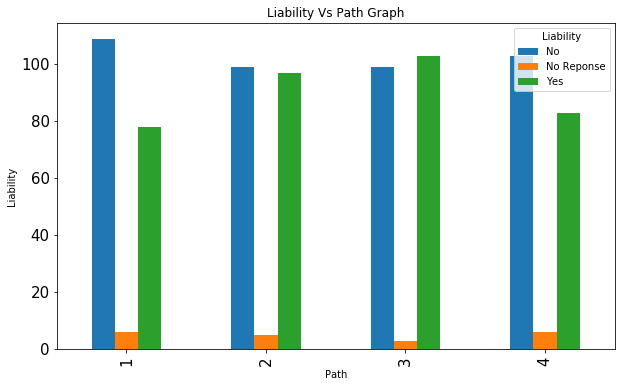

Liability,No,No Reponse,Yes
Path,,,
1,109,6,78
2,99,5,97
3,99,3,103
4,103,6,83


In [18]:
## Plot Juror Responce vs Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


pd.crosstab(newdf.Path,newdf.Liability).plot(kind='bar', fontsize = 15, figsize=(10,6))
plt.title('Liability Vs Path Graph')
plt.xlabel('Path')
plt.ylabel('Liability')
plt.savefig('Juror Response vs Path')
plt.show()

a = newdf['Path']
b = newdf['Liability']
pd.crosstab(a,b)

In [19]:
## Finding winrate percentage for each path 
ratedf=pd.DataFrame(newdf[['Liability','Path','Was_McNeil_negligent']])
ratedf['winrate_percentage']=ratedf.Liability

##  Case Expected Value Damages:
### Showing the total expected damages mean,median and sd with winrate percentage (entire version)

In [20]:

ratedf['winrate_percentage']=newdf.Liability
ratedf['damages_mean']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) + pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58) 
ratedf['damages_median']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14 )+pd.to_numeric( newdf.Non_economic_damages_McNeil_suffered_58) 
ratedf['damages_sd']=pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_14) + pd.to_numeric(newdf.Non_economic_damages_McNeil_suffered_58)
ratedf['winrate_percentage'] = ratedf['winrate_percentage'].map({"Yes":1, "No":0})

winrate_damages_expected=ratedf.groupby('Path').aggregate(
    {'winrate_percentage': np.mean
     ,'damages_mean': np.mean
     ,'damages_median':np.median
     ,'damages_sd':np.std
    })


winrate_damages_expected.winrate_percentage*=100
winrate_damages_expected

,winrate_percentage,damages_mean,damages_median,damages_sd
Path,,,,
1,41.711230,100735.699482,0.0,181063.194368
2,49.489796,111415.422886,0.0,175733.229103
3,50.990099,105321.951220,0.0,169067.435658
4,44.623656,112500.026042,0.0,189577.911915


## Finding the Damages, mean , median and SD when plaintiff wins.

In [21]:

winrate_damages_plaintiffwin = ratedf.loc[(ratedf['Was_McNeil_negligent']== 1) & (ratedf['Liability']=='Yes')].groupby('Path').aggregate(
    {'damages_mean': np.mean
     ,'damages_median':np.median
     ,'damages_sd':np.std
    })
winrate_damages_plaintiffwin

,damages_mean,damages_median,damages_sd
Path,,,
1,263374.687500,250000.0,187269.191927
2,217755.102041,150000.0,187308.405512
3,200714.285714,150000.0,166498.873870
4,243750.156250,250000.0,169781.411890


# Box Plot for Total Damages(Both Economic Damage and NonEconomic Damage) vs Path.

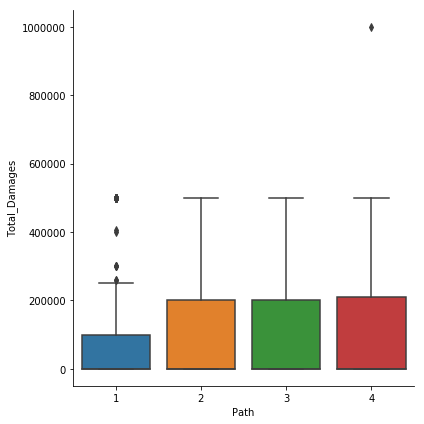

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.factorplot(x='Path', y='Total_Damages', kind='box',data=newdf, size=6)
